In [3]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import fiona
# import pyshp

In [4]:
data = 'data/nairobi.shp'


In [5]:
gdf= gpd.read_file(data)
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
gdf.tail()

,AreaH,PerM,AreaM,PlotNo,LRNumber,owner_id,geometry
79996,5.100230,1092.710,51002.30,80996,LRNO/80996,None,"POLYGON ((36.74959 -1.26243, 36.74795 -1.26203..."
79997,10.241900,2212.230,102419.00,80997,LRNO/80997,None,"POLYGON ((36.74315 -1.26376, 36.74236 -1.26355..."
79998,0.588594,311.960,5885.94,80998,LRNO/80998,None,"POLYGON ((36.78916 -1.25168, 36.78914 -1.25156..."
79999,0.435804,268.916,4358.04,80999,LRNO/80999,None,"POLYGON ((36.78977 -1.25158, 36.78989 -1.25090..."
80000,0.452074,269.430,4520.74,81000,LRNO/81000,None,"POLYGON ((36.79025 -1.25172, 36.79038 -1.25098..."


In [10]:
gdf.index = np.arange(1, len(gdf) + 1)
gdf.head()

,AreaH,PerM,AreaM,PlotNo,LRNumber,owner_id,geometry
1,0.075741,113.8550,757.413,1000,LRNO/1000,None,"POLYGON ((36.87962 -1.28471, 36.87955 -1.28454..."
2,0.015678,64.2584,156.776,1001,LRNO/1001,None,"POLYGON ((36.87969 -1.28489, 36.87967 -1.28484..."
3,0.015935,64.4557,159.353,1002,LRNO/1002,None,"POLYGON ((36.88004 -1.28490, 36.87982 -1.28499..."
4,0.015678,64.2601,156.781,1003,LRNO/1003,None,"POLYGON ((36.88008 -1.28500, 36.87986 -1.28509..."
5,0.015678,64.2601,156.781,1004,LRNO/1004,None,"POLYGON ((36.87988 -1.28514, 36.87986 -1.28509..."


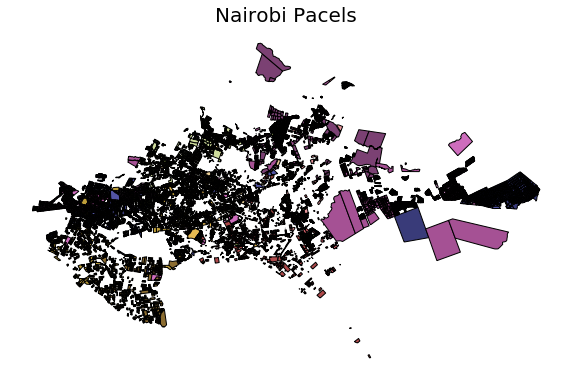

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.set_title("Nairobi Pacels", fontsize=20)
ax.set_axis_off()


gdf.plot(ax=ax, edgecolor='k', cmap='tab20b', alpha=1)
# gdf

In [12]:
# gdf.sort_index()

In [19]:
choices = list(range(1000, 81001))
len(choices)

80001

In [20]:
# gdf['PlotNo']= list(range(1000,81001))
gdf['LRNumber']= ['LRNO/{}'.format(i) for i in range(1000,81001)]

In [24]:
gdf = gdf.set_crs('epsg:4326')

# slicing the dataframe to 1000 features
gdf_slice = gdf.iloc[0:500, : ]


del gdf_slice['owner_id']
del gdf_slice['AreaM']
gdf_slice
gdf_slice.to_file('plots2.shp')

In [25]:
len(gdf_slice)
gdf_slice.tail()

,AreaH,PerM,PlotNo,LRNumber,geometry
996,0.082500,115.000,1995,LRNO/1995,"POLYGON ((36.97355 -1.26717, 36.97335 -1.26702..."
997,0.082504,115.003,1996,LRNO/1996,"POLYGON ((36.97327 -1.26696, 36.97307 -1.26681..."
998,0.082501,115.001,1997,LRNO/1997,"POLYGON ((36.97307 -1.26681, 36.97287 -1.26666..."
999,0.118497,186.998,1998,LRNO/1998,"POLYGON ((36.97291 -1.26703, 36.97267 -1.26684..."
1000,0.118500,187.000,1999,LRNO/1999,"POLYGON ((36.97267 -1.26684, 36.97243 -1.26666..."


In [11]:
# fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# ax.set_title("Nairobi Pacels", fontsize=20)
# ax.set_axis_off()


# gdf.plot(ax=ax, edgecolor='k', cmap='tab20b', alpha=1)
# # gdf

In [11]:
from shapely.geometry import  MultiPolygon, shape
Multi = MultiPolygon([shape(pol['geometry']) for pol in fiona.open(data)])
# Multi.wkt

In [12]:
# getting a list of polygons in a multipolygon
Polygons = list(Multi)
# Polygons

In [13]:
len(Polygons)

80001

In [14]:
from shapely.geometry import MultiPolygon, Polygon

multipolygon = MultiPolygon([Polygon([(0, 0), (1, 1), (1, 0)]),
                             Polygon([(0, 0), (1, 1), (0, 1)])])

polygons = list(multipolygon)
print(*polygons)
# POLYGON ((0 0, 1 1, 1 0, 0 0)) POLYGON ((0 0, 1 1, 0 1, 0 0))

polygons = list(multipolygon.geoms)
print(*polygons)
# POLYGON ((0 0, 1 1, 1 0, 0 0)) POLYGON ((0 0, 1 1, 0 1, 0 0))

for polygon in multipolygon:
    pass# same for multipolygon.geoms
#     print(polygon)
# POLYGON ((0 0, 1 1, 1 0, 0 0))
# POLYGON ((0 0, 1 1, 0 1, 0 0))

POLYGON ((0 0, 1 1, 1 0, 0 0)) POLYGON ((0 0, 1 1, 0 1, 0 0))
POLYGON ((0 0, 1 1, 1 0, 0 0)) POLYGON ((0 0, 1 1, 0 1, 0 0))


In [32]:
primes = [2, 3, 5, 7, 11, 13]

print(*primes)

2 3 5 7 11 13


In [33]:
#  https://geoffboeing.com/2015/10/exporting-python-data-geojson/

In [34]:
def df_to_geojson(df, properties, lat='latitude', lon='longitude'):
    geojson = {'type':'FeatureCollection', 'features':[]}
    for _, row in df.iterrows():
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}
        feature['geometry']['coordinates'] = [row[lon],row[lat]]
        for prop in properties:
            feature['properties'][prop] = row[prop]
        geojson['features'].append(feature)
    return geojson

In [36]:
output_filename = 'dataset.js'
# with open(output_filename, 'wb') as output_file:
#     output_file.write('var dataset = ')
#     json.dump(geojson, output_file, indent=2) 
    

In [37]:
from geojson import Point, Feature, FeatureCollection, dump

point = Point((-115.81, 37.24))

features = []
features.append(Feature(geometry=point, properties={"country": "Spain"}))

# add more features...
# features.append(...)

feature_collection = FeatureCollection(features)

with open('myfile.geojson', 'w') as f:
   dump(feature_collection, f)

In [ ]:
# To write a geojson object to a temporary file this function can be used:

import geojson
import tempfile

def write_json(self, features):
   # feature is a shapely geometry type
   geom_in_geojson = geojson.Feature(geometry=features, properties={})
   tmp_file = tempfile.mkstemp(suffix='.geojson')
   with open(tmp_file[1], 'w') as outfile:
      geojson.dump(geom_in_geojson, outfile)
   return tmp_file[1]